#Задание

Однопродуктовый склад с постоянным запасом, пополняемым в начале каждого периода. 

Спрос осуществляется в течение периода. 
При наличии неудовлетворенного спроса фиксируется отказ. 

Неиспользованный в периоде запас идет в убытки и не переходит в следующий период. 

Подобрать минимальный размер постоянного запаса с вероятностью отказа не больше 17% с минимальными убытками за период.

Для имитации спроса используйте только функцию «Спрос» данного проекта с указанием номера варианта, например, Спрос(НомерВарианта;СЛЧИС()). 


In [ ]:
def warehouse_model(prob_of_failure = 0.17,
                      mu = 4000,
                      sigma = 400,
                      n = 1000):
  import random
  import numpy as np
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
  plt.style.use('seaborn')
  
  final_data_on_warehouse = []

  warehouse_level = 0 #задаем начальный запас на складе
  sum_of_fails = 0
  test_prob_of_fail = 1

  while test_prob_of_fail > prob_of_failure:
    for i in range(n):
      #далее генерируем случайный спрос
      demand = random.gauss(mu, sigma)

      if demand > warehouse_level:
        sum_of_fails += 1 
        #для каэжого уровня запаса на складе определяется соответв. ему вероятность отказа в n испытаниях:
    test_prob_of_fail = sum_of_fails / n

    #добавляем каждые новые данные по величине запаса и вероятности отказа в датасет:
    final_data_on_warehouse.append({"Warehouse level": warehouse_level,
                                    "Probability of failure": test_prob_of_fail})
    
    warehouse_level += 1
    sum_of_fails = 0
  
  #Создаем датасет для дальнейшего построения графика:
  df_warehouse = pd.DataFrame(final_data_on_warehouse)

  #Строим график:

  fig, ax = plt.subplots(figsize = (16, 8))
  sns.scatterplot(ax = ax, data = df_warehouse, x = 'Warehouse level', y = 'Probability of failure', color = 'green')
  ax.set_xlabel('Величина запаса на складе', size = 14)
  ax.set_ylabel('Вероятность отказа', size = 14)
  ax.axhline(prob_of_failure, linewidth=2, color='blueviolet', linestyle='-.', label = 'Ожидаемая вероятность отказа')
  ax.legend(fontsize = 15)

  #Выводим итоговые результаты и график:
  print(f'Запас на складе = {warehouse_level}')
  print(f'Ожидаемая вероятность отказа в результате {n} прогонов модели = {test_prob_of_fail}')
  plt.show()

Запас на складе = 4365
Ожидаемая вероятность отказа в результате 1000 прогонов модели = 0.166


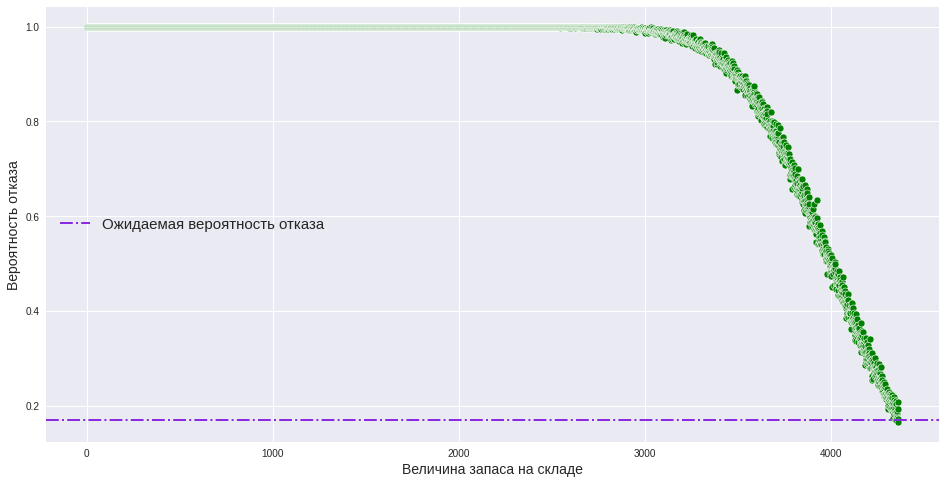

In [ ]:
warehouse_model(0.17, 4000, 400, 1000)